In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from kerastuner import HyperModel, RandomSearch
from keras import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras import  layers


In [4]:
# load the mist dataset
mist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mist.load_data()

In [5]:
# normlize the dataset
X_train, X_test = X_train/255.0, X_test/255.0


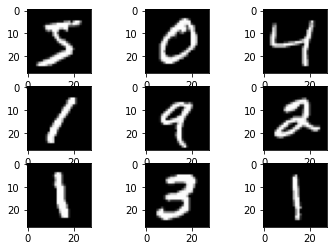

In [6]:
# plot a smaple of the dataset
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')


In [9]:
# Finding best hyperparameters
class ClassificationHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Flatten())
        model.add(
            layers.Dense(
                units=hp.Int('units_1', 100, 500, 25, default=2),
                activation=hp.Choice(
                    'dense_activation_1',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape,
                kernel_initializer='zeros', bias_initializer='zeros'
            )
        )
        model.add(
            Dense(
                units=hp.Int('units_2', 100, 500, 25, default=100),
                activation=hp.Choice(
                    'dense_activation_2',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
            )
        )

        model.add(layers.Dense(10, activation='softmax',
                  kernel_initializer='zeros', bias_initializer='zeros'))
        model.compile(
            optimizer='adam',
            loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
        )

        return model


In [10]:
input_shape = (X_train.shape[1],)
hypermodel = ClassificationHyperModel(input_shape)

In [11]:
tuner_rs = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    seed=42,
    max_trials=10,
    executions_per_trial=1, overwrite=True
)


In [12]:
tuner_rs.search(X_train, y_train, epochs=5, batch_size=64,
                validation_split=0.2, verbose=2)


Trial 10 Complete [00h 00m 52s]
val_accuracy: 0.10599999874830246

Best val_accuracy So Far: 0.10599999874830246
Total elapsed time: 00h 08m 12s
INFO:tensorflow:Oracle triggered exit


In [13]:
tuner_rs.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 350
dense_activation_1: relu
units_2: 275
dense_activation_2: tanh
Score: 0.10599999874830246
Trial summary
Hyperparameters:
units_1: 450
dense_activation_1: tanh
units_2: 325
dense_activation_2: relu
Score: 0.10599999874830246
Trial summary
Hyperparameters:
units_1: 300
dense_activation_1: relu
units_2: 500
dense_activation_2: sigmoid
Score: 0.10599999874830246
Trial summary
Hyperparameters:
units_1: 475
dense_activation_1: relu
units_2: 475
dense_activation_2: relu
Score: 0.10599999874830246
Trial summary
Hyperparameters:
units_1: 325
dense_activation_1: relu
units_2: 225
dense_activation_2: tanh
Score: 0.10599999874830246
Trial summary
Hyperparameters:
units_1: 475
dense_activation_1: tanh
units_2: 300
dense_activation_2: tanh
Score: 0.10599999874830246
Trial summary
Hyperparameters:
units_1: 125
dense_activation_1: relu
units_2: 400
dense_activation_2: sigmoid
Score: 0.10599

In [7]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(350, activation='relu'))
model.add(Dense(275, activation='tanh'))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 350)               274750    
                                                                 
 dense_1 (Dense)             (None, 275)               96525     
                                                                 
Total params: 371,275
Trainable params: 371,275
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 3.7444 - accuracy: 0.6461
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 3.6816 - accuracy: 0.8638
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 3.6684 - accuracy: 0.9237
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 3.6608 - accuracy: 0.9423
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 3.6568 - accuracy: 0.9508
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 3.6541 - accuracy: 0.9568
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 3.6526 - accuracy: 0.9589
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 3.6505 - accuracy: 0.9647
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 3.6496 - accuracy: 0.9660
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 3.6490 - accuracy: 0.9674

In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.6576 - accuracy: 0.9683


[3.657630443572998, 0.9682999849319458]

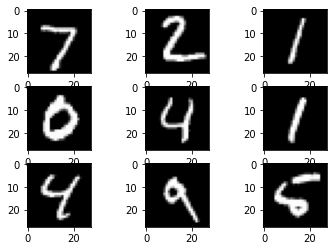

In [11]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap='gray')

In [17]:
for i in range(9):
    print(f'The actual value: {y_test[i]} | The predicted value: {np.argmax(model.predict(X_test)[i])}')

313/313 [==============================] - 1s 2ms/step
The actual value: 7 | The predicted value: 7
313/313 [==============================] - 1s 3ms/step
The actual value: 2 | The predicted value: 2
313/313 [==============================] - 1s 2ms/step
The actual value: 1 | The predicted value: 1
313/313 [==============================] - 1s 2ms/step
The actual value: 0 | The predicted value: 0
313/313 [==============================] - 1s 3ms/step
The actual value: 4 | The predicted value: 4
313/313 [==============================] - 1s 3ms/step
The actual value: 1 | The predicted value: 1
313/313 [==============================] - 1s 2ms/step
The actual value: 4 | The predicted value: 4
313/313 [==============================] - 1s 3ms/step
The actual value: 9 | The predicted value: 9
313/313 [==============================] - 1s 3ms/step
The actual value: 5 | The predicted value: 5


In [21]:
model.save("model.h5")
